# Lecture 46: What is a Category data type?

In [5]:
import pandas as pd
import os
os.getcwd()

'/home/eloy/Programming/Udemy/Python_A_to_Z'

In [6]:
# Make sure the current working directory is the one with our data in it
# If not
#os.chdir('/home/eloy/Programming/Udemy/Python_A_to_Z/')

In [7]:
movies = pd.read_csv("Movie-Ratings.csv")

In [8]:
len(movies)

559

In [9]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
# We probably want to clean up these column names to make them 'nicer'
# i.e. no spaces, no odd characters (%, $), standardized case, etc.
movies.columns = ['Film','Genre','RTRating','AudienceRating','Budget','YearOfRelease']

In [12]:
movies.head()

,Film,Genre,RTRating,AudienceRating,Budget,YearOfRelease
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
RTRating          559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
YearOfRelease     559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.2+ KB


In [14]:
# Note that the last four columns are all numeric int64 types
# However, if you think of how we might use YearOfRelease in our analysis
# it probably more closely matches Genre than Ratings or Budget
# We may want to group by year. So this means it should be treaded as a 
# Category type, not a numeric.

In [15]:
movies.describe()

,RTRating,AudienceRating,Budget,YearOfRelease
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [16]:
# Case in point again, the .describe() function results make little
# sense for the YearOfRelease variable. This is another clue that
# YearOfRelease is a Category Variable
#
# So let's change this, and the other 'object' types to categories
# Note: This is the same as a 'factor' in R

In [17]:
movies.Film = movies.Film.astype('category')

In [18]:
movies.Genre = movies.Genre.astype('category')

In [19]:
movies.YearOfRelease = movies.YearOfRelease.astype('category')

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
RTRating          559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
YearOfRelease     559 non-null category
dtypes: category(3), int64(3)
memory usage: 21.9 KB


In [21]:
# To get unique values of any category...
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [22]:
# or
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

# Lecture 47: Working with JointPlots

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [24]:
# Jointplots

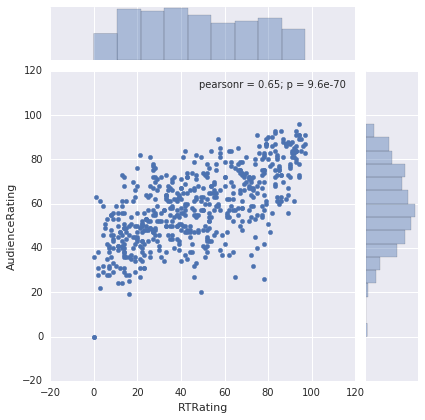

In [25]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating')

In [26]:
# Note that AudienceRating is nearly Normal, while RTRating (the critics at Rotten Tomatoes) is more uniform
# Let's take the above chart and make some changes

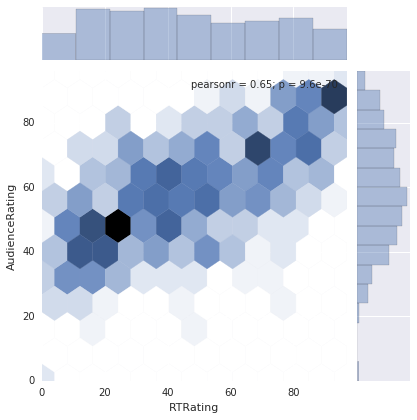

In [27]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='hex')

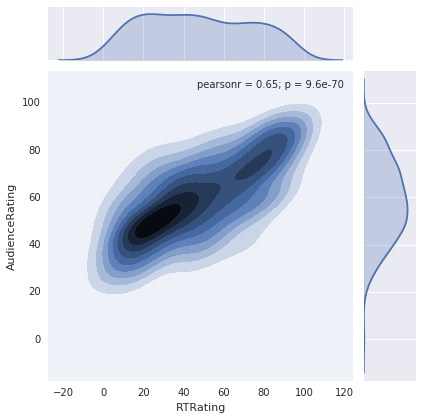

In [28]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='kde')

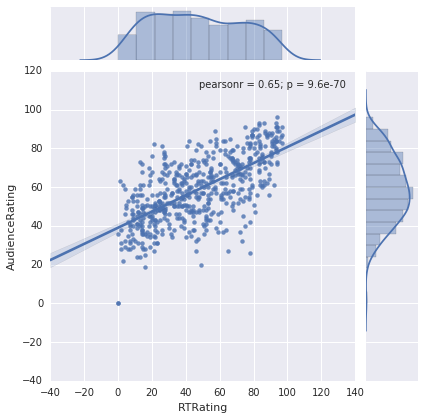

In [29]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='reg')

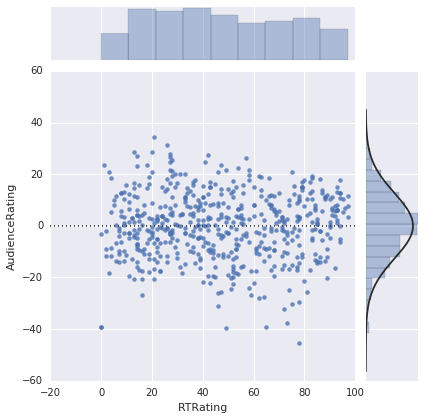

In [30]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='resid')

# Lecture 48: Histograms

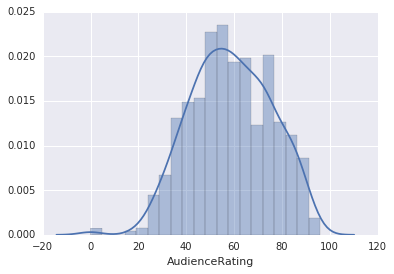

In [31]:
m1 = sns.distplot(movies.AudienceRating, bins=20)

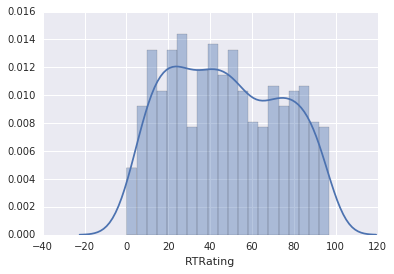

In [32]:
m2 = sns.distplot(movies.RTRating, bins=20)

In [33]:
# What would this look like in base pyplot, without the seaborn add-on

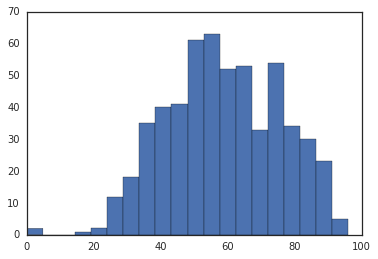

In [34]:
sns.set_style('white') # Go back to default style
n1 = plt.hist(movies.AudienceRating, bins=20)

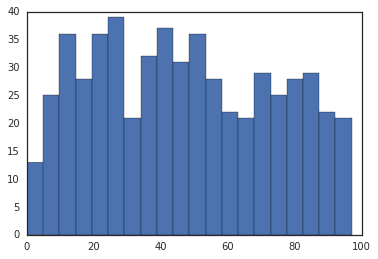

In [35]:
n1 = plt.hist(movies.RTRating,bins=20)

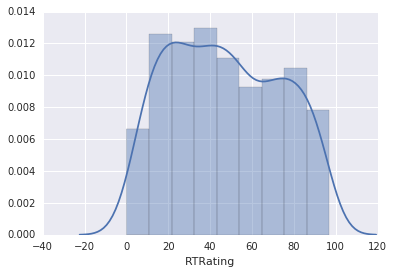

In [36]:
sns.set() # Set default styling back and check
sns.distplot(movies.RTRating)

# Lecture 49: Stacked historgrams in Python

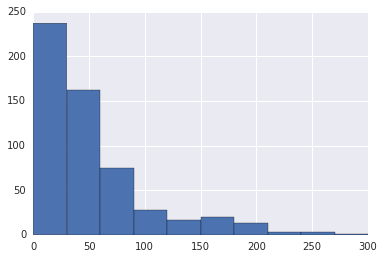

In [39]:
h1 = plt.hist(movies.Budget)

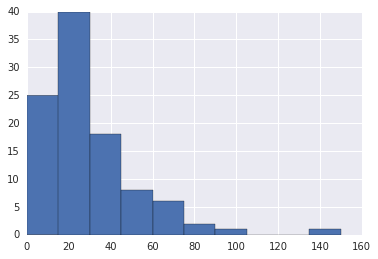

In [52]:
# But if we only want to see a certain Genre, we need to filter
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.show()

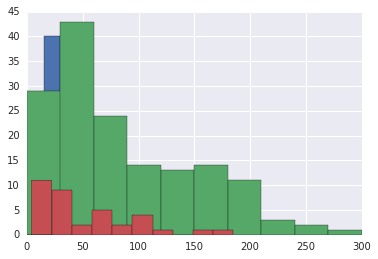

In [50]:
# We can see multiple on the same plot
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.hist(movies[movies.Genre == 'Action'].Budget)
plt.hist(movies[movies.Genre == 'Thriller'].Budget)
plt.show()

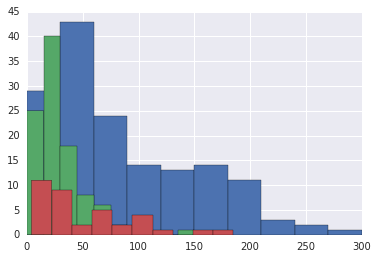

In [55]:
#But Drama is hidden, so we need to manually change the order (First goes in back, last in front)
plt.hist(movies[movies.Genre == 'Action'].Budget)
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.hist(movies[movies.Genre == 'Thriller'].Budget)
plt.show()

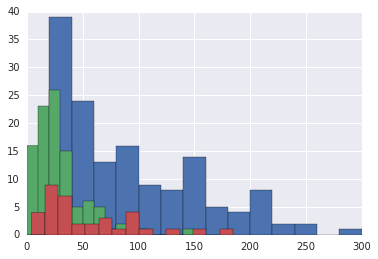

In [56]:
# But the default # bins are different for each, so let's standardize
plt.hist(movies[movies.Genre == 'Action'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].Budget, bins=15)
plt.show()

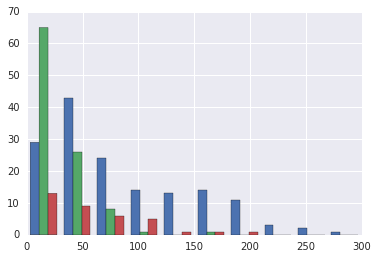

In [59]:
# But if we didn't want to have to worry about bars being hidden
# We could show them side-by-side by passing in a list
BudgetByGenre = [movies[movies.Genre == 'Action'].Budget,
                 movies[movies.Genre == 'Drama'].Budget,
                 movies[movies.Genre == 'Thriller'].Budget]
plt.hist(BudgetByGenre)
plt.show()

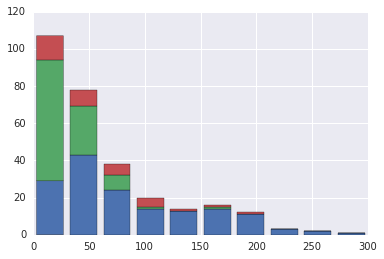

In [60]:
# Or we could stack them by setting the parameter 'stacked' to True
plt.hist(BudgetByGenre, stacked=True)
plt.show()

In [81]:
# This is fine for smaller numbers of groups, but what if we had a lot of genres or whatever
# our group may be?
genrelist = list()

In [87]:
for genre in movies.Genre.cat.categories:
    genrelist.append(movies[movies.Genre == genre].Budget)

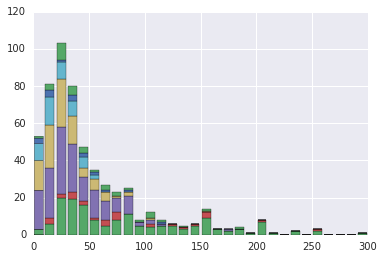

In [91]:
plt.hist(genrelist, stacked=True, bins=30)
plt.show()

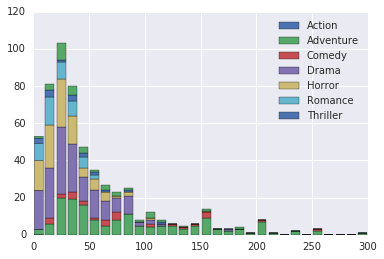

In [99]:
# Now to create a legend, which also needs to be a list
genreLabels = []
for genre in movies.Genre.cat.categories:
    genreLabels.append(genre)

plt.hist(genrelist, stacked=True,bins=30, label=genreLabels)
plt.legend()
plt.show()

# Lecture 50: Creating a KDE Plot

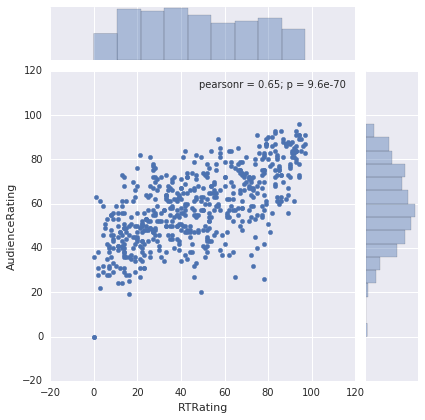

In [102]:
# Kernel Density Estimate Plot
# How can we visualize Audience Rating vs Critic Rating?
# A scatter plot or joint plot would be one idea, which we've already done.
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating')

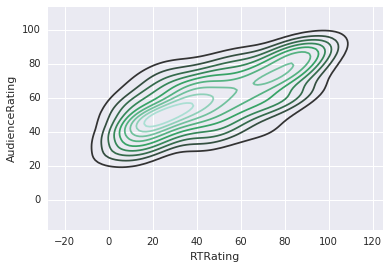

In [103]:
# Another way would be with a KDE plot
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating)

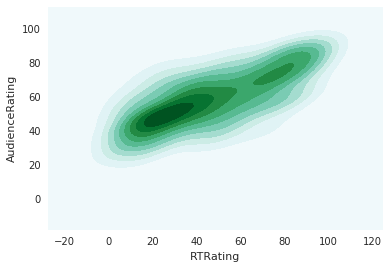

In [105]:
# Shading
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, shade=True)

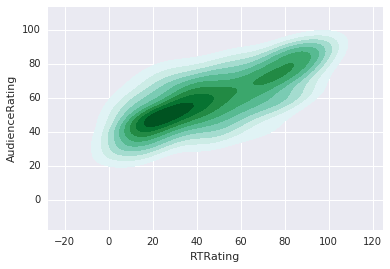

In [106]:
# That removes our grid due to the entire rest of the plot being considered part of the lowest shade
# We can fix this though
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, shade=True, shade_lowest=False)

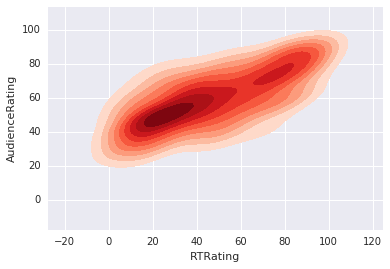

In [108]:
# We can also use pre-defined colour palettes
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')

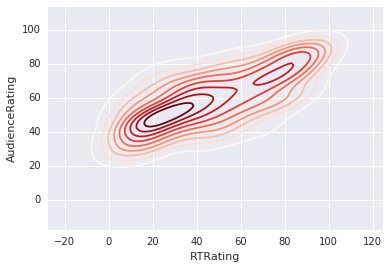

In [109]:
# Tip: To make a clearer graph, note that if we only do the cmap
# we get a nice outline
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, cmap='Reds')

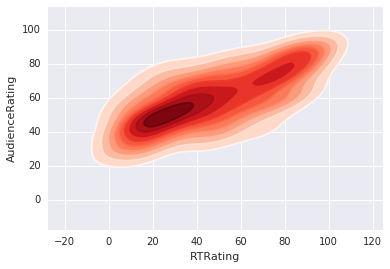

In [115]:
# Now we can overlay the outline ontop of the shaded plot as two seperate plots
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')
k12 = sns.kdeplot(movies.RTRating, movies.AudienceRating,cmap='Reds')

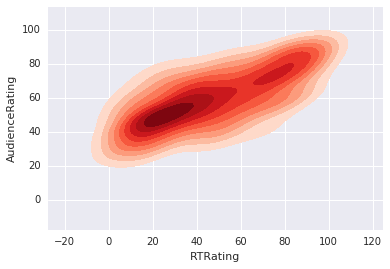

In [113]:
# and the original, for comparison
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')

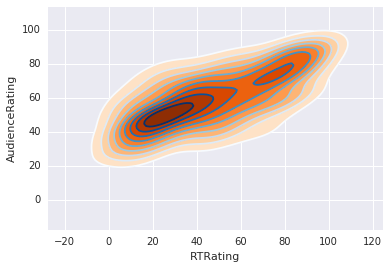

In [118]:
# Or you could use different colors
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Oranges')
k12 = sns.kdeplot(movies.RTRating, movies.AudienceRating,cmap='Blues')

# Lecture 51: Working with Subplots()

# Lecture 52: Violinplots vs Boxplots